# Flight Price Prediction 
**OBJECTIVE:**
* Predict flight ticket prices based on date, destination, and other factors. 



**DATA COLLECTION:**
* Data is collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Clean_Dataset.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


non-numeric: airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class

no null value

In [5]:
# Let's check for duplicates
df.duplicated().sum()
# no duplicates

np.int64(0)

# DISCOVER
* our data has columns like airline, flight, source_city, stops, arrivale time etc among them source and destination city data doesnot conclude anything. 
* also duration and days left tells; duration: total time of flight measure in hours and days lefts means days remaining until the flight's departure. 
* value 1 for days remaining mean flights are booked just one day before their departure.
* duration like 2.17 mean that the flights are direct flights whereas duration like 9.67 or 26.42 hr means there were layovers(waiting of flights at places or airports) before reaching mumbai.
* identify the data ranges, mean, medians and standard deviations for numerical columns

# STRUCTURING 
* organize: reshaping data, handling missing values, converting data types
* ensuring data is in standardized manner which helps for further manipulation and exploration

# CLEANING
* to address inconsistencies, errors and outliers within dataset
* correcting inaccurate data, handling duplicates, and addressing any anomalies
* focus on enhancing data accuracy and make the data error-free as possible

# ENRICHING
* adding additional datas to provide more depth or context
- mergings datasets or incorporating external data sources

# VALIDATING
- checks the quality and reliability of processed data
- by using visualization tools(boxplots, histogram, scatterplots)


# PUBLISHING

In [6]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

**INSHORT**
- missing values(done)
- duplicate values(done)
- correct data types(na garne)
- outliers(k ho ra kasari garne?)
- standardize/ normalize values
- typos or formatting issues
- remove irrelevant columns(done)
- encode categorical variables( label encoding/one hot encoding)(done)
- remove invalid or unusual values(eg: datas entered range is 5-10 but the entry is 100 then remove or correct it)
- feature engineering(add/ modify the colums or features)(no need)
- check the datas and then save the cleaned datas(done)



### **Titanic Dataset**
* The Titanic Dataset is a dataset curated on the basis of the passengers on titanic, like their age, class, gender, etc to predict if they would have survived or not. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**About Titanic Dataset**

The predefined columns are -

* Passenger Class (Pclass): This categorical variable indicates the ticket class of each passenger, ranging from 1st class (wealthiest) to 3rd class (lower socioeconomic status).

* Name: The names of passengers, providing insight into their identities.

* Sex: Gender of passengers, categorized as male or female.

* Age: Age of passengers, providing information about the demographic composition of the Titanic's passengers.

* SibSp: Number of siblings/spouses aboard the Titanic, offering insight into family relationships.

* Parch: Number of parents/children aboard the Titanic, indicating family size and composition.

* Ticket: Ticket number, providing additional information about passenger accommodations and fare details.

* Fare: Fare paid by each passenger, which can be indicative of their ticket class and economic status.

* Cabin: Cabin number or location, offering insights into passenger accommodations.

* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton), providing information about passengers' embarkation points.

* Survived: This binary variable indicates whether a passenger survived the disaster (1) or not (0), serving as the primary outcome variable for analyses.

Dataset can be downloaded from [here](https://www.kaggle.com/c/titanic/data). We will be using only train.csv for this tutorial.

hamile dataset ko columns lai pani define garnu parxa

jati ota warning aauxa program ma teslai ignore garne
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

print(df.shape)
(89,10) ie 89 rows and 10 columns

NOTES KO EXAMPLES:
- hamile titanic dataset leko xam, tyo vanya titanic ma bhako passenger ko age, class,etc.



In [7]:
df.duplicated().sum()

np.int64(0)

no duplicate values

- For proper data analysis, converting non-numeric features to numeric values is often necessary, but not always mandatory.
- two types: categorical and numeric.
- Categorical values need to be converted into a numerical format before they can be used in machine learning models. This process is known as encoding.
- Label encoding assigns a unique integer to each category.For categorical variable is ordinal (i.e., has a meaningful order).
- One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.For nominal categorical variables (i.e., no intrinsic ordering).

yo encoding ko chai benefits k hunxa?

In [8]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [9]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

In [10]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

object datatype means any kind of datatypes

In [11]:

categorical_variables = df.dtypes[df.dtypes == "object"].index
categorical_variables
df_object=df[categorical_variables]
df_object.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy


In [12]:
df.columns


Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
for category in categorical_variables:
    print(f"Number of unique values in {category} = {len(df[category].unique())}")

Number of unique values in airline = 6
Number of unique values in flight = 1561
Number of unique values in source_city = 6
Number of unique values in departure_time = 6
Number of unique values in stops = 3
Number of unique values in arrival_time = 6
Number of unique values in destination_city = 6
Number of unique values in class = 2


In [14]:
df_clean=df_object.drop(columns=['flight','source_city','destination_city','class'])

In [15]:
df_clean.head()

,airline,departure_time,stops,arrival_time
0,SpiceJet,Evening,zero,Night
1,SpiceJet,Early_Morning,zero,Morning
2,AirAsia,Early_Morning,zero,Early_Morning
3,Vistara,Morning,zero,Afternoon
4,Vistara,Morning,zero,Morning


order wala value xaina sab one hot encoding garnu parne datas xa

In [16]:
df_clean.shape

(300153, 4)

# df_clean_encoded lekhda ni hunxa if chaiyo vane

In [17]:
df_clean_encoded= pd.get_dummies(df_clean, columns=['stops'], drop_first=True)
df_clean_encoded.head()

,airline,departure_time,arrival_time,stops_two_or_more,stops_zero
0,SpiceJet,Evening,Night,False,True
1,SpiceJet,Early_Morning,Morning,False,True
2,AirAsia,Early_Morning,Early_Morning,False,True
3,Vistara,Morning,Afternoon,False,True
4,Vistara,Morning,Morning,False,True


In [18]:
encoded_columns = ['stops_two_or_more','stops_zero']
df_clean_encoded[encoded_columns] = df_clean_encoded[encoded_columns].astype(int)


In [19]:
df_clean_encoded.head()

,airline,departure_time,arrival_time,stops_two_or_more,stops_zero
0,SpiceJet,Evening,Night,0,1
1,SpiceJet,Early_Morning,Morning,0,1
2,AirAsia,Early_Morning,Early_Morning,0,1
3,Vistara,Morning,Afternoon,0,1
4,Vistara,Morning,Morning,0,1


encode gareko kura lai 0 or 1 ie numeric value ma convert garne


In [20]:
!pip install scikit_learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


* we use sklearn's LabelEncoder to encode the target variable/label encoder

In [21]:
from sklearn.preprocessing import LabelEncoder

labelEncoder code is used from sklearn.preprocessing module to encode in pandas dataframe used to convert categorical into numeric values.

yo code use garda chai raw categorical data lai direct encode garna milcha
ani mathi ko code use garda chai one hot encoding garera ani numeric value dina

In [22]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df_clean_encoded = df_clean_encoded.copy()

# Fit and transform the 'Sex' column
df_clean_encoded['airline'] = label_encoder.fit_transform(df_clean_encoded['airline'])
df_clean_encoded['departure_time'] = label_encoder.fit_transform(df_clean_encoded['departure_time'])
df_clean_encoded['arrival_time'] = label_encoder.fit_transform(df_clean_encoded['arrival_time'])
print(df_clean_encoded.head())

   airline  departure_time  arrival_time  stops_two_or_more  stops_zero
0        4               2             5                  0           1
1        4               1             4                  0           1
2        0               1             1                  0           1
3        5               4             0                  0           1
4        5               4             4                  0           1


- 0 and 1 vanya binary unique value xa vane hunxa
- 4,5 vanya there are 6 unique values
- so multiple ko lagi labelencoder nai thik

In [23]:
df_clean_encoded.isnull().sum()

airline              0
departure_time       0
arrival_time         0
stops_two_or_more    0
stops_zero           0
dtype: int64

In [24]:
df_clean_encoded.head()

,airline,departure_time,arrival_time,stops_two_or_more,stops_zero
0,4,2,5,0,1
1,4,1,4,0,1
2,0,1,1,0,1
3,5,4,0,0,1
4,5,4,4,0,1


In [25]:
df_clean_encoded.to_csv("titanic_clean.csv", index=False)

In [27]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [28]:
df_outliers=df.drop(columns=['Index','source_city','flight','destination_city'])

In [29]:
df_outliers.columns

Index(['airline', 'departure_time', 'stops', 'arrival_time', 'class',
       'duration', 'days_left', 'price'],
      dtype='object')

**possible outliers**

# explain this code


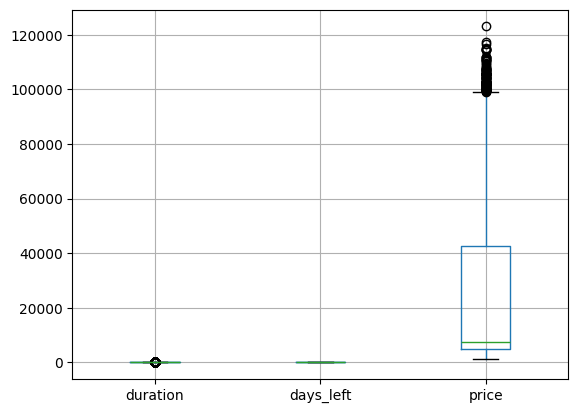

Outliers using Z-score:
          airline departure_time        stops arrival_time     class  \
10540   Air_India  Early_Morning  two_or_more      Evening   Economy   
20464     Vistara        Morning  two_or_more      Evening   Economy   
20467     Vistara        Morning  two_or_more      Evening   Economy   
29417   Air_India        Morning  two_or_more        Night   Economy   
29418   Air_India  Early_Morning  two_or_more        Night   Economy   
...           ...            ...          ...          ...       ...   
299018    Vistara        Morning          one      Evening  Business   
299407    Vistara  Early_Morning          one      Evening  Business   
299458    Vistara        Morning          one      Evening  Business   
299700    Vistara  Early_Morning          one      Evening  Business   
300068    Vistara  Early_Morning          one      Evening  Business   

        duration  days_left  price  
10540      36.92          4  12321  
20464      35.83          3  17462  


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

columns_to_check = ['duration', 'days_left', 'price']

# Method 1: Box plot for visual inspection
df_outliers[columns_to_check].boxplot()
plt.show()

# Method 2: Identifying outliers using Z-score
z_scores = np.abs(stats.zscore(df_outliers[columns_to_check]))
outliers_zscore = df_outliers[(z_scores > 3).any(axis=1)]
print("Outliers using Z-score:")
print(outliers_zscore)

# Method 3: Identifying outliers using IQR
Q1 = df_outliers[columns_to_check].quantile(0.25)
Q3 = df_outliers[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df_outliers[((df_outliers[columns_to_check] < (Q1 - 1.5 * IQR)) | (df_outliers[columns_to_check] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers using IQR:")
print(outliers_iqr)

kina yei columns ko outliers leko ra z score ra boxplot ma k farak xa?

- The Z-score outliers indicate numerical values that are far from the dataset's mean. These points may represent rare events, premium services, or data issues. Investigating the corresponding categorical context (e.g., airline, class) provides more insights into the reasons behind these anomalies.
- High Prices or Short Durations:
Rows like 299018 suggest unusual combinations of very high prices for short durations, which might indicate premium services, rare travel times, or data errors.
- Clusters of Outliers:
Some rows have similar price outliers (e.g., 89537), suggesting these could be a specific pattern or anomaly in the dataset
- Actionable Outcomes:
Investigate why these outliers exist:
Are they valid (e.g., premium services)?
Or data errors (e.g., incorrect entries)?
Decide whether to keep, transform, or remove these outliers based on the context.

**Definition of Outliers**
- Outliers are data points that significantly deviate from the majority of the dataset. They lie far away from the central values, either much higher or much lower than expected, and can occur due to errors, variability in data, or rare events.
- mostly chai numeric ma use hunxa kina vane tyo mean median haru ma use hunxa
- based on min median max quartile values

**interpreting the boxplot**
- duration: box is very small indicating low variability in dataset
- days_left: same as duration
- price: box and whiskers are much larger showing higher variability in price data
**insights**
- price has right skewed distribution as outliers are on the upper end
- others have minimal variation
**best for price.why?**
- many data points that lie far outside the typical range
- 

-Z-score is a statistical measure that quantifies how many standard deviations a data point is from the mean of a dataset. It is commonly used to identify outliers or to standardize data for comparison across different distributions.

ya bata conclusion k nikalnu parne ho?

**INSHORT**
- missing values(done)
- duplicate values(done)
- outliers(k ho ra kasari garne?)(done tara k ho?)
- remove irrelevant columns(done)
- encode categorical variables( label encoding/one hot encoding)(done)
- remove invalid or unusual values(eg: datas entered range is 5-10 but the entry is 100 then remove or correct it)
- feature engineering(add/ modify the colums or features)(no need or do we need?)
- check the datas and then save the cleaned datas(done)
**whats the difference**
- standardize/ normalize values(yo ra correct datatype ma k farak xa?)
- correct data types(na garne)
- typos or formatting issues



hamro cleaned data kasto hunxa? encoding outlier haru ni involved bhako hunxa ki k?

# EDA

questions:
- outliers data cleaning ma parxa ki eda ma parxa?

**visualizing distributions**

- UNIVARIATE ANALYSIS: visualizing one feature or variable at a time
- histpot for numeric values and count plot for categorical values
- histogram plot:result is a graph that shows the frequency of values in the dataset, making it easier to identify patterns like skewness, central tendency, and spread.
- Countplot:
creates a bar plot where each bar represents a category, and the height of the bar indicates how many data points belong to that category.

- helps us understand patterns, relationships and distribution in dataset
-